# Get Results Fast with fastai

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

![](../graphics/fastai-01.png)

## 1. The fastai Philosophy

- [fastai](https://www.fast.ai/) is a deep learning library and course created by Jemery Howard and Rachel Thomas. 
- I like to use this analogy: **keras is to Tensorflow as fastai is to PyTorch.**
- Unlike keras, fastai is **very opinionated** library. 
- Instead of creating a generic tools for deep learning experts to use, the fastai founders are creating courses and a library that make it **dramatically easier and faster** to get cutting-edge results quickly with deep learning. 
- One tool they use to accomplish this is by **encoding best practices from research directly into the library**. 
- This approach has led to some pretty dramatic results, including [training a model on imagenet in 18 minutes](https://www.fast.ai/2018/08/10/fastai-diu-imagenet/) and some breakthrough results in [pretraining models for natural language processing](https://arxiv.org/pdf/1801.06146.pdf). 
- Now, there are some trade-offs. In my experience, fastai can be buggy, difficult to debug, and challenging to generalize in some cases. 
- My thinking on these trade-offs, in late 2019, is this: 

1. For quickly exploring + testing top-performing models and new ideas on your own datasets, **it's hard to beat fastai**. In my experience, you'll be able to test lots of ideas quickly, and move fast. 
2. Having a reasonable good understanding of the underlying PyTorch code can make you much more effective with fastai, allowing you to "pick and choose" the parts of the fastai library you want to use, and what you want to implement yourself in PyTorch. 
3. I still really like Keras and Tensorflow, but I rarely use these libraries as **starting points** on new projects. 

---

## 2. Quick Computer Vision example with fastai

In [2]:
from fastai.vision import *

In [3]:
#Download our data if we don't have it:
path = untar_data(URLs.DOGS)

The fastai untar_data method downloads are data, and returns a Pathlib path to the location where our data is stored:

In [4]:
path.ls()

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/valid'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/.DS_Store'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/test1'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/sample'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train')]

In [5]:
path_train=path/'train'

In [6]:
path_train.ls()

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/cats'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/.DS_Store')]

Here, our data is "labeled" by the name of the folder that it's in. 

In [7]:
fnames = get_image_files(path/'train'/'dogs')
fnames[:5]

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.8011.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.7322.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.1753.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.3144.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.775.jpg')]

When our data is organized in this way, we can use fastai's `ImageDataBunch.from_folder` to load our dataset.

## 2.1 ImageDataBunch

In [8]:
bs=16 #Batch Size, decrease this if you run out of GPU memory (you may need to restart your kernel if this happens)
sz = 224 #Image Size

In [9]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, size = sz, bs=bs, ds_tfms = tfms)

In [30]:
data

ImageDataBunch;

Train: LabelList (23000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Test: None

In [18]:
data.train_ds[0]

(Image (3, 224, 224), Category dogs)

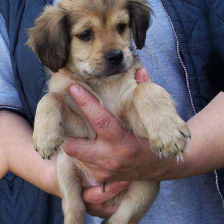

In [19]:
data.train_ds[0][0]

Fastai includes pretty reasonable data augmentation be default:

In [31]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.014961470066667149, 'col_pct': 0.08131646014353522, 'padding_mode': 'reflection'}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([ 0.1065,  0.1120, -0.0725,  0.1130]), 'invert': False}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={'degrees': 2.8187168297607244}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={'scale': 1.0113275207995238, 'row_pct': 0.056946714494953476, 'col_pct': 0.230651605364375

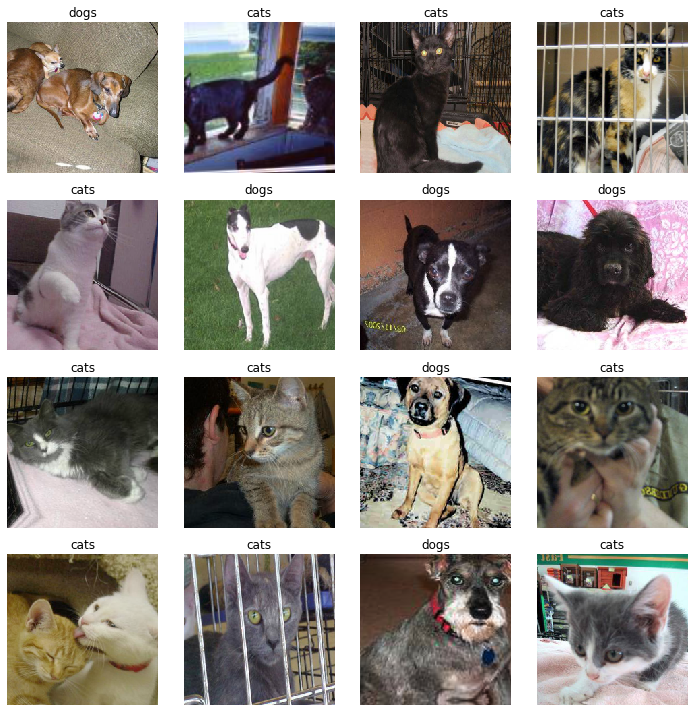

In [10]:
#fast ai has some nice built in visualization methods:
data.show_batch(rows = 5, figsize = (10, 10))

### 2.2. Re|sNet

![](../graphics/imagenet_over_time-01.png)

- Fastai makes is really easy to pull in cutting-edge pretrained models. 
- Here's well grab resnet34, this is a pretty nice startng point for lots of computer vision problems:

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained=True)

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
print(learn.summary())

- As you can see, resnet34 is a pretty complex model! Imagine 
- On challenging part of deep learning is finding good learning rates. 
- fastai has an interesting approach here: **empirically determine a good learning rate plotting the loss as a function of learning rate for one gradient descent step**. 
- They wrap this up into a method called `lr_find`:

### 2.3 Training

In [20]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

- This plot show the value of our loss function after taking a gradient decent step using the learning rate shown on the x axis.
- These plots should generally follow a "u shaped curvee" - once our learning rate is too high - we "move to far" in our paremeter space, and our error jumps up. 
- Jermey howard a simple hueristic here: figure out where the curves is maximally steep and move down about an order of magnitude to choose a good learning rate. 
- This is of course jsut a rule of thumb, but it does work pretty well in practice. 

In [ ]:
lr=1e-2

- Training is pretty slow on CPU, you can download my pretrained model [here](http://www.welchlabs.io/unccv/intro_to_computer_vision/dogs_vs_cats.pth), just put the pth in the data directory of this repo.'
- fastai has a couple of fit methods, including a really nice (but still somewhat uncommon) implementation of an idea called [cyclical learning rates](https://arxiv.org/pdf/1506.01186.pdf). 
- The idea behind cyclical learning rates to vary the learning rate through training, ideally helping us "hop out" of local minima. 
- Instead of passing in one single learning rate, we pass in a maximum learning rate, andd `fit_one_cycle` cylcles the learning rate up to our `max_lr` and back down. 

In [22]:
#If we don't want to take the time to train here , we can load saved model weights from data directory
# learn.model_dir = Path(os.getcwd().split('fastai')[0])/'data'
# learn.load('dogs_vs_cats');

In [8]:
learn.fit_one_cycle(cyc_len = 4, max_lr = 1e-2)

- Fastai also has some really nice interpretation methods. 
- One of my favorite methods is `plot_top_losses`, which shows the examples for which our model was the most wrong. 

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

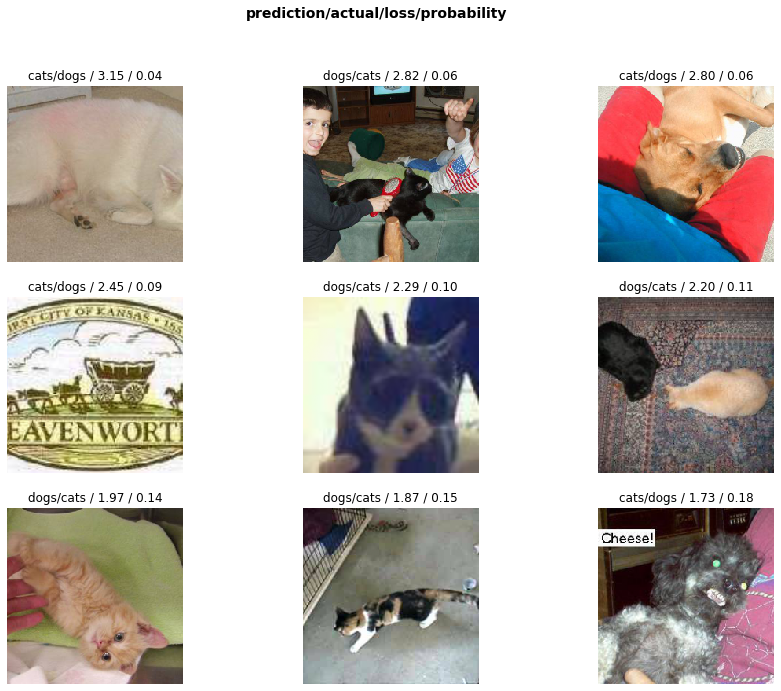

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

- We can also do other nice things like quickly visualize confusion matrices, and print out where our model 

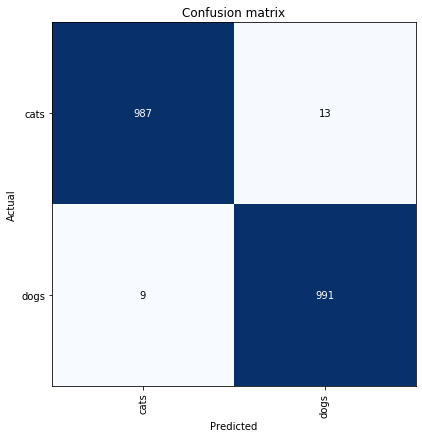

In [25]:
interp.plot_confusion_matrix(figsize = (6, 6))

In [26]:
interp.most_confused(min_val=2)

[('cats', 'dogs', 13), ('dogs', 'cats', 9)]

### 2.4 Unfreezing, fine-tuning, and differential learning rates

In [32]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

- Be default, when we load up a new model in fastai, most of the layers are frozen. 
- The idea here is that we should first try training just the last layers of our model. Doing this is faster, more stable, and in some cases all we need!
- Of course, in practice, we may achieve better performance by training all our weights. 
- To allow our entire model to learn, we simply need to call `learn.unfreeze()` to unfreeze our weights.


In [34]:
learn.unfreeze()

In [38]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

- One more neat idea here that's built into fastai: **differential learning rates**. 
- The idea here is that we may not want to use as high of a learing rate on the early layers in our network. These layeres typically represent simpler primiatives or lower level repsentations, such as edge detectors, and the idea here is that these have already been well-learned by the pretrained imagenet model, so we shouldn't change these weights as much!
- We can implement differential learning rates in fastai's `fit_one_cycle` by just passing in `slice(lr1, lr2)`. This call will smoothly vary the learning rate from `lr1` in the first layer to `lr2` in the final layer.  

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

## 3. Tabular/Columnar Data with fastai

- The world is full to tabular data. 
- Historically deep learning has not been terribly effective on these datasets. 
- However, in the last couple years, we've seen deep learning techniques being successfully applied to tabular data. 
- There's a [terrific fastai post on this](https://www.fast.ai/2018/04/29/categorical-embeddings/), and some nice mediume posts from [Pinterest Engineering](https://medium.com/the-graph/applying-deep-learning-to-related-pins-a6fee3c92f5e) and [Instacart](https://tech.instacart.com/deep-learning-with-emojis-not-math-660ba1ad6cdc). 
- fastai now includes a tabular module that wraps up a lot of functionality around training deep nets on tabular data. 

In [46]:
from fastai.tabular import *

In [69]:
#Grab an adult income dataset:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
df.shape

(32561, 15)

In [48]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


- fastai includes a `TabularList` object that allows us to quickly stage our data for our models. 
- To setup our `TabularList`, we need to decide which columsn we'll use as prediction targets (`dep_var`), and which columns are categorical, and which columns are continuous variables. 

### 3.1 Setup TabularDataBunch

In [50]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

In [51]:
#Data Prepre-processing
procs = [FillMissing, Categorify, Normalize]

In [55]:
# Fill missing by default uses the median value of each column, we can of change this behavior if needed. 
# FillMissing?

In [59]:
#First we'll create a tabular list for our test set:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [60]:
test[0]

age                               45
workclass                    Private
fnlwgt                         96975
education               Some-college
education-num                    NaN
marital-status              Divorced
occupation         Handlers-cleaners
relationship               Unmarried
race                           White
sex                           Female
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
salary                          <50k
Name: 800, dtype: object

In [61]:
#And now a full training databunch:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [63]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,False,-1.2891,0.6687,-0.4224,<50k
Private,HS-grad,Never-married,Craft-repair,Own-child,White,False,-0.1896,-0.6888,-0.4224,<50k
Private,Some-college,Divorced,Exec-managerial,Not-in-family,White,False,1.1297,-0.7419,-0.0312,<50k
Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,False,0.4701,-0.9597,-0.0312,>=50k
Private,12th,Married-civ-spouse,Adm-clerical,Wife,White,False,-0.4095,3.1317,-0.8135,<50k


In [71]:
data.train_ds[0]

(TabularLine workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; education-num_na False; age 0.7632; fnlwgt -0.8381; education-num 0.7511; ,
 Category >=50k)

In [73]:
x, y = data.one_batch()

In [74]:
x, y

([tensor([[ 5, 12,  3,  9,  4,  5,  1],
          [ 7, 12,  3,  9,  1,  5,  1],
          [ 5, 10,  1, 13,  5,  5,  1],
          [ 7,  3,  5,  4,  2,  3,  1],
          [ 3, 13,  1, 11,  5,  5,  1],
          [ 5, 10,  3,  8,  1,  5,  1],
          [ 3, 12,  3,  4,  1,  5,  1],
          [ 3, 12,  3,  8,  1,  5,  1],
          [ 6, 13,  3, 13,  1,  5,  1],
          [ 5, 11,  3,  5,  1,  5,  1],
          [ 7, 16,  3, 13,  1,  5,  1],
          [ 7, 11,  3, 11,  1,  5,  1],
          [ 5, 10,  5, 13,  4,  5,  1],
          [ 5, 10,  3,  5,  1,  5,  1],
          [ 7, 16,  5,  4,  4,  5,  1],
          [ 5, 13,  3, 11,  1,  2,  1],
          [ 5,  1,  5, 11,  4,  4,  1],
          [ 6,  8,  1,  5,  5,  5,  1],
          [ 5,  8,  5, 11,  5,  5,  1],
          [ 5, 10,  3, 11,  1,  5,  1],
          [ 3, 16,  3, 12,  1,  5,  1],
          [ 1, 16,  3,  1,  6,  5,  1],
          [ 3, 10,  1, 11,  2,  5,  1],
          [ 5, 12,  3, 15,  1,  5,  1],
          [ 1, 16,  5,  1,  5,  5,  1],


- Note that fastai is doing some really cool stuff behind the scenes:

In [81]:
data.train_dl.cat_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'education-num_na']

In [83]:
data.train_dl.cont_names

['age', 'fnlwgt', 'education-num']

### 3.2 Setup Learner

In [79]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [84]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

- Notice anything different from our previous learners?
- What's going one with those embedding layers? 
- As you may know, these **embeddings** are really the trick to making deep learning work on tabular data. 
- These trainable embedding layers are [built into Pytorch](https://pytorch.org/docs/stable/nn.html#embedding), and allow us to map from discrete categorical variables a continuous high dimensional space. 
- Here's a create embedding visualization from [Instacart](https://tech.instacart.com/deep-learning-with-emojis-not-math-660ba1ad6cdc) showing embedding of varoius grocery categories:

![](../graphics/insta_cart_embedding.png)

- When we use an embedding to map from categorical variables to continuous variables, we get to choose the **dimension of the embeddding space**. 
- In the visualization above, embeddings are shown in a 2-dimensional space. 
- The hope here is that as our embedding layer learns, it will learn a **space that is semantically meaninful**. (e.g. The concept of saturday may be close in the embedding space to the concept of Sunday)
- In practice, it's generally best to use higher dimensional spaces, with more dimensions for categorical variables with more higher cardinality. 
- There's a few "rules of thumb" built into fastai, that will choose dimensions based on your data. 
- You can also pass in your own embedding dimensions into `tabular_learner`. 
- Another way to think about these embedding layers is as an efficient (look up table based) implementation of a one-hot encoding followed by a fully connected layer  

In [85]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.369687,0.375033,0.830000,00:05


In [88]:
row = df.iloc[0]

In [89]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.3943, 0.6057]))

## 4. Natural Langauge with fastai

In [90]:
from fastai.text import *

### 4.1 Load IMDB Data

In [91]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/Users/stephenwelch/.fastai/data/imdb_sample/texts.csv')]

In [93]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [94]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u